In [2]:
# import time
# from datetime import datetime
# from selenium import webdriver
# from bs4 import BeautifulSoup
# import pandas as pd
# from tqdm import tqdm
# import numpy as np

# url = 'https://www.twse.com.tw/zh/trading/historical/bwibbu.html'

!pip freeze > requirements.txt

In [2]:
import time
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import pandas as pd
from tqdm import tqdm
import pytest
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select

In [2]:
def job(stock_code):
    url = 'https://www.twse.com.tw/zh/trading/historical/bwibbu.html'
    service = Service(executable_path='./chromedriver.exe')
    options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=service, options=options)
    driver.get(url=url)

    driver.find_element("xpath", '//*[@id="label1"]').send_keys(stock_code)
    
    stock_dict = {}
    
    with tqdm( total = 14*12 - 5,  position=0, leave=True) as pbar:
        for i in range(2010,2024):
            for j in range(1,13):
                if i == 2023 and j == 8:
                    break
                select_element_year = driver.find_element(By.NAME, 'yy')
                select_year = Select(select_element_year)
                select_year.select_by_value(str(i))

                select_element_month = driver.find_element(By.NAME, 'mm')
                select_month = Select(select_element_month)
                select_month.select_by_value(str(j))

                driver.find_element("xpath", '//*[@id="form"]/div/div[1]/div[3]/button').click()
                time.sleep(2.5)

                html_source = driver.page_source
                soup = BeautifulSoup(html_source, 'lxml')
                
                if soup.select_one('tbody') == None:
                    continue
                
                tmp_column_cnt = 0
                tmp_columns_dict = {}
                for idx,th in enumerate(soup.select_one('thead').select('tr')[0].select('th')):
                    tmp_columns_dict[idx] = th.text.strip()
                    tmp_column_cnt += 1
                    
        
                for tr in soup.select_one('tbody').select('tr'):
                    # check invalid value
                    valid = True
                    for td in tr.select('td'):
                        value = td.text.strip()
                        if value in ['', ' ', '-']:
                            valid = False
                            break
                    if valid == True:
                        for idx,td in enumerate(tr.select('td')):
                            key = tmp_columns_dict[idx]
                            value = td.text.strip()
                            if key in stock_dict.keys():
                                stock_dict[key].append(value)
                            else:
                                stock_dict[key] = [value]
                minLen = 99999999999
                for k,v in stock_dict.items():
                    if len(v) < minLen:
                        minLen = len(v) 
                for key in stock_dict:
                    stock_dict[key] = stock_dict[key][-minLen:]
                df = pd.DataFrame(stock_dict)

                pbar.update(1)
                
    date = datetime.today().strftime("%Y%m%d")
    file_name = '{0}_{1}日本益比殖利率及股價淨值比資訊.csv'.format(date,stock_code)
    df.to_csv(file_name, encoding='utf_8_sig')
    
    driver.close()

In [3]:
# -- coding: utf-8 --**

import threading
import json

# AI
stock_list = ['2454','2330','6214','2308','2357','2353']

threads = []
for stock_code in stock_list:
  threads.append(threading.Thread(target = job, args = (stock_code,)))
  threads[-1].start()
    
# Computer
stock_list = ['2377', '2324', '2356', '2376', '3231', '8215']

threads = []
for stock_code in stock_list:
  threads.append(threading.Thread(target = job, args = (stock_code,)))
  threads[-1].start()

# weaving
stock_list = ['1414', '1434', '1451', '1457', '1476', '1477'] 

threads = []
for stock_code in stock_list:
  threads.append(threading.Thread(target = job, args = (stock_code,)))
  threads[-1].start()


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 163/163 [07:21<00:00,  2.71s/it]


# 資料整理

In [245]:
# Stock list is a two dimensional list
# The first order is category, i.e AI/Computer/Weaving
# The second order is sample, i.e. first stock of AI, ...

category = 3
sample = 6
stock_list = []

# AI
stock_list.append(['2330','2330','6214','2308','2357','2353'])

# Computer
stock_list.append(['2377', '2324', '2356', '2376', '3231', '8215'])

# Weaving
stock_list.append(['1414', '1434', '1451', '1457', '1476', '1477'])

df_list_2 = []

# Read all stock information
# for i in range(category):
#     for j in range(sample):
#         tmp = pd.read_csv('20230716_{}股票資訊.csv'.format(stock_list[i][j])).replace('X0.00', 0)
#         tmp = tmp.replace(r'\D+', '', regex=True)
#         df_list.append(tmp[tmp['成交股數'] != 0])
for i in range(category):
    for j in range(sample):
        tmp = pd.read_csv('20230718_{}日本益比殖利率及股價淨值比資訊.csv'.format(stock_list[i][j]))
        df_list_2.append(tmp)
        

        
for k in range(len(df_list_2)):
    for m in range(len(df_list_2[k]['日期'])):
        df_list_2[k]['日期'][m] = df_list_2[k]['日期'][m].replace('年','').replace('月','').replace('日','')
        if df_list_2[k]['日期'][m][0] == '-':
            df_list_2[k]['日期'][m] = 'None'
    df_list_2[k] = df_list_2[k][df_list_2[k]['日期'] != 'None']
            
            
df_list_2

C:\Users\Howard Lin\AppData\Local\Temp\ipykernel_33892\2611227449.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list_2[k]['日期'][m] = df_list_2[k]['日期'][m].replace('年','').replace('月','').replace('日','')
C:\Users\Howard Lin\AppData\Local\Temp\ipykernel_33892\2611227449.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list_2[k]['日期'][m] = 'None'


[      Unnamed: 0       日期   本益比  殖利率(%)  股價淨值比  股利年度  財報年/季
 0              0  1060412 14.82    3.66   3.56   105  105/4
 1              1  1060413 14.86    3.66   3.57   105  105/4
 2              2  1060414 14.66    3.70   3.53   105  105/4
 3              3  1060417 14.55    3.73   3.50   105  105/4
 4              4  1060418 14.58    3.72   3.51   105  105/4
 ...          ...      ...   ...     ...    ...   ...    ...
 1528        1528  1120712 14.68    1.90   4.87   111  112/1
 1529        1529  1120713 14.86    1.88   4.93   111  112/1
 1530        1530  1120714 15.02    1.86   4.98   111  112/1
 1531        1531  1120717 15.02    1.86   4.98   111  112/1
 1532        1532  1120718 14.76    1.89   4.89   111  112/1
 
 [1531 rows x 7 columns],
       Unnamed: 0       日期   本益比  殖利率(%)  股價淨值比  股利年度  財報年/季
 0              0  1060412 14.82    3.66   3.56   105  105/4
 1              1  1060413 14.86    3.66   3.57   105  105/4
 2              2  1060414 14.66    3.70   3.53   105  10

In [246]:
# Stock list is a two dimensional list
# The first order is category, i.e AI/Computer/Weaving
# The second order is sample, i.e. first stock of AI, ...

category = 3
sample = 6
stock_list = []
# AI
stock_list.append(['2330','2330','6214','2308','2357','2353'])
# stock_list.append(['2454','2330','6214','2308','2357','2353'])

# Computer
stock_list.append(['2377', '2324', '2356', '2376', '3231', '8215'])
# stock_list.append(['2377', '2324', '2356', '2376', '3231', '8215'])

# Weaving
stock_list.append(['1414', '1434', '1451', '1457', '1476', '1477'])

df_list_1 = []

# Read all stock information
for i in range(category):
    for j in range(sample):
        tmp = pd.read_csv('20230716_{}股票資訊.csv'.format(stock_list[i][j])).replace('X0.00', 0)
        tmp = tmp.replace(r'\D+', '', regex=True)
        df_list_1.append(tmp[tmp['成交股數'] != 0])

In [247]:
def df_merge_joint_date(df_list, category, sample):
    df_joint_date = pd.merge(df_list[0]['日期'], df_list[1]['日期'], on=['日期'], how='inner').drop_duplicates(subset=['日期'])
    for i in range(2, category * sample):
        df_joint_date = pd.merge(df_joint_date, df_list[i]['日期'], on=['日期'], how='inner').drop_duplicates(subset=['日期'])  
    return df_joint_date
    
df_joint_date_1 = df_merge_joint_date(df_list_1, category, sample)
df_joint_date_2 = df_merge_joint_date(df_list_2, category, sample)
df_joint_date = pd.merge(df_joint_date_1, df_joint_date_2, how='inner').drop_duplicates(subset=['日期'])  

df_joint_date

,日期
0,1120703
1,1120704
2,1120705
3,1120706
4,1120710
...,...
299,1120626
300,1120627
301,1120628
302,1120629


In [312]:

# Perform the datetime injection to all stock
df_list_final = []
for i in range(category):
    for j in range(sample):
        index = i*sample +ｊ
        df_list_1[index]['成交金額'] = df_list_1[index]['成交金額'].astype(np.float64)   
        df_list_1[index] = pd.merge(df_list_1[index], df_joint_date, on=['日期'], how='inner').drop_duplicates(subset=['日期'])  
        df_list_2[index] = pd.merge(df_list_2[index], df_joint_date, on=['日期'], how='inner').drop_duplicates(subset=['日期'])
        
        tmp = pd.merge(df_list_1[index], df_list_2[index], on=['日期'], how='inner')
        df_list_final.append(tmp)
        
df_list_final

[     Unnamed: 0_x       日期      成交股數           成交金額    開盤價    最高價    最低價  \
 0             251  1120703  15118041  8743824984.00 578.00 580.00 576.00   
 1             252  1120704  17777363 10361905547.00 585.00 585.00 580.00   
 2             253  1120705  15553503  9060750346.00 589.00 589.00 579.00   
 3             254  1120706  32069711 18234491768.00 573.00 574.00 565.00   
 4             256  1120710  18996089 10794393087.00 567.00 573.00 565.00   
 ..            ...      ...       ...            ...    ...    ...    ...   
 299          3150  1120626  29870090 17192208130.00 576.00 578.00 574.00   
 300          3151  1120627  22447417 12847067878.00 570.00 575.00 569.00   
 301          3152  1120628  18684508 10734873692.00 579.00 579.00 571.00   
 302          3153  1120629  18046268 10372330946.00 578.00 580.00 570.00   
 303          3154  1120630  33830922 19401712736.00 570.00 576.00 568.00   
 
        收盤價  漲跌價差   成交筆數  Unnamed: 0_y   本益比  殖利率(%)  股價淨值比  股利年度  財報年/季  

In [313]:
df_final = pd.concat(df_list_final)
df_final

,Unnamed: 0_x,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,Unnamed: 0_y,本益比,殖利率(%),股價淨值比,股利年度,財報年/季
0,251,1120703,15118041,8743824984.00,578.00,580.00,576.00,579.00,300,15659,1521,14.71,1.90,4.88,111,112/1
1,252,1120704,17777363,10361905547.00,585.00,585.00,580.00,585.00,600,18848,1522,14.86,1.88,4.93,111,112/1
2,253,1120705,15553503,9060750346.00,589.00,589.00,579.00,582.00,300,16504,1523,14.79,1.89,4.90,111,112/1
3,254,1120706,32069711,18234491768.00,573.00,574.00,565.00,565.00,1700,60108,1524,14.35,1.95,4.76,111,112/1
4,256,1120710,18996089,10794393087.00,567.00,573.00,565.00,565.00,000,17792,1526,14.35,1.95,4.76,111,112/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,3164,1120710,4530586,1389239130.00,307.50,312.50,302.00,307.00,600,4073,1525,20.80,4.72,5.82,111,112/1
300,3165,1120711,4029066,1224784101.00,306.50,307.00,300.50,305.50,150,3436,1526,20.70,4.75,5.79,111,112/1
301,3166,1120712,4948103,1520718335.00,307.50,312.50,303.50,305.00,050,5315,1527,20.66,4.75,5.78,111,112/1
302,3167,1120713,3421162,1041137237.00,308.00,310.00,299.00,301.00,400,3760,1528,20.39,4.82,5.70,111,112/1


In [314]:
# df_final.loc['成交股數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差', '成交筆數', '本益比', '殖利率(%)', '股價淨值比']

df_final.drop('Unnamed: 0_x', inplace=True, axis=1)
df_final.drop('Unnamed: 0_y', inplace=True, axis=1)
df_final.drop('日期', inplace=True, axis=1)
df_final.drop('股利年度', inplace=True, axis=1)
df_final.drop('財報年/季', inplace=True, axis=1)

df_final = df_final.reset_index()

In [315]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_final['index'] = df_final['index'].astype(str)
df_final['成交股數'] = df_final['成交股數'].astype(int)
df_final["開盤價"] = round(df_final["開盤價"][5468])
df_final["最高價"] = round(df_final["最高價"][5468])
df_final["最低價"] = round(df_final["最低價"][5468])
df_final["收盤價"] = round(df_final["收盤價"][5468])
df_final['漲跌價差'] = df_final['漲跌價差'].astype(int)
df_final['成交筆數'] = df_final['成交筆數'].astype(int)

In [316]:
df_final.describe()

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,本益比,殖利率(%),股價淨值比
count,5472.00,5472.00,5472.00,5472.00,5472.00,5472.00,5472.00,5472.00,5472.00,5472.00,5472.00
mean,10652816.41,2347164646.18,306.00,307.00,300.00,306.00,211.02,7831.12,18.68,5.28,2.33
std,20495633.80,6303357963.63,0.00,0.00,0.00,0.00,384.46,17318.28,18.49,2.93,1.83
min,22094.00,372186.00,306.00,307.00,300.00,306.00,0.00,18.00,3.38,1.30,0.47
25%,797697.75,37444174.00,306.00,307.00,300.00,306.00,10.00,610.75,9.41,3.10,0.94
50%,3515057.00,288240130.50,306.00,307.00,300.00,306.00,50.00,2516.00,15.07,4.84,1.50
75%,11429338.00,839269875.50,306.00,307.00,300.00,306.00,250.00,5881.00,21.93,6.47,3.48
max,351514949.00,80057158264.00,306.00,307.00,300.00,306.00,4000.00,217895.00,177.69,18.67,9.00


In [327]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   5472 non-null   object 
 1   成交股數    5472 non-null   int32  
 2   成交金額    5472 non-null   float64
 3   開盤價     5472 non-null   int64  
 4   最高價     5472 non-null   int64  
 5   最低價     5472 non-null   int64  
 6   收盤價     5472 non-null   int64  
 7   漲跌價差    5472 non-null   int32  
 8   成交筆數    5472 non-null   int32  
 9   本益比     5472 non-null   float64
 10  殖利率(%)  5472 non-null   float64
 11  股價淨值比   5472 non-null   float64
dtypes: float64(4), int32(3), int64(4), object(1)
memory usage: 449.0+ KB


In [318]:
y_values = []
for i in range(category):
    for j in range(sample):
        index = i*sample +ｊ
        y_values.extend([i for k in range(df_joint_date.shape[0])])

y_values = np.array(y_values)

y_values

array([0, 0, 0, ..., 2, 2, 2])

In [329]:
x_values = df_final.values[:,1:]
x_values = np.array(x_values, dtype=np.float64)
x_values

array([[1.51180410e+07, 8.74382498e+09, 3.06000000e+02, ...,
        1.47100000e+01, 1.90000000e+00, 4.88000000e+00],
       [1.77773630e+07, 1.03619055e+10, 3.06000000e+02, ...,
        1.48600000e+01, 1.88000000e+00, 4.93000000e+00],
       [1.55535030e+07, 9.06075035e+09, 3.06000000e+02, ...,
        1.47900000e+01, 1.89000000e+00, 4.90000000e+00],
       ...,
       [4.94810300e+06, 1.52071834e+09, 3.06000000e+02, ...,
        2.06600000e+01, 4.75000000e+00, 5.78000000e+00],
       [3.42116200e+06, 1.04113724e+09, 3.06000000e+02, ...,
        2.03900000e+01, 4.82000000e+00, 5.70000000e+00],
       [7.33794500e+06, 2.27898399e+09, 3.06000000e+02, ...,
        2.06000000e+01, 4.77000000e+00, 5.76000000e+00]])

# PCA

In [336]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.cluster import KMeans

# x_scaled = preprocessing.normalize(x_values, norm='l2')
mean, std = x_values.mean(axis=1).reshape(-1, 1), x_values.std(axis=1).reshape(-1, 1)
x_scaled = (x_values - mean) / std

mean, std = x_scaled.mean(axis=1), x_scaled.std(axis=1)
# x_scaled, y_values = shuffle(x_scaled, y_values, random_state=0)
pca = PCA(n_components=3)

x_pca = pca.fit_transform(x_scaled)

x_pca_frame = pd.DataFrame(x_pca, columns=['pca_1', 'pca_2', 'pca_3'])
x_pca_frame.head()

,pca_1,pca_2,pca_3
0,-0.08,0.00,0.00
1,-0.08,0.00,0.00
2,-0.08,0.00,0.00
3,-0.08,0.00,0.00
4,-0.08,0.00,0.00


In [337]:
from sklearn.cluster import KMeans

est = KMeans(n_clusters=3, n_init=100, init='k-means++',max_iter=100000, verbose=0, random_state=87)

est.fit(x_pca)

KMeans(max_iter=100000, n_clusters=3, n_init=100, random_state=87)

In [338]:
print(y_values.shape)
y_values_true_answer = pd.DataFrame(y_values.reshape(-1, 1), columns=['answer'])
kmeans_clustering_labels = pd.DataFrame(est.labels_, columns=['cluster'])

x_pca_frame_final = pd.concat([x_pca_frame, kmeans_clustering_labels], axis=1)
x_pca_frame_final = pd.concat([x_pca_frame_final, y_values_true_answer], axis=1)
print(x_pca_frame_final.head())
x_pca_frame_final.to_csv('shark.csv', encoding='utf_8_sig')

(5472,)
   pca_1  pca_2  pca_3  cluster  answer
0  -0.08   0.00   0.00        1       0
1  -0.08   0.00   0.00        1       0
2  -0.08   0.00   0.00        1       0
3  -0.08   0.00   0.00        1       0
4  -0.08   0.00   0.00        1       0


calinski_harabaz_score with k = 3 is 21752.002579306853


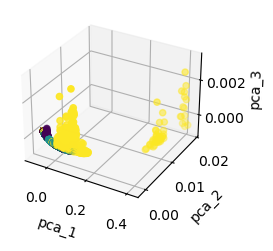

In [339]:
import matplotlib.pylab as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

d = {}
fig_reduced_data = plt.figure(figsize=(12,12))
for k in range(3,4):
    est = KMeans(n_clusters=k, random_state=111)
    y_pred = est.fit_predict(x_pca)
    calinski_harabaz_score = metrics.calinski_harabasz_score(x_pca_frame, y_pred)
    d.update({k: calinski_harabaz_score})
    print('calinski_harabaz_score with k = {0} is {1}'.format(k, calinski_harabaz_score))
    
    ax = plt.subplot(4,3,k-1,projection='3d')
    ax.scatter(x_pca_frame.pca_1,x_pca_frame.pca_2,x_pca_frame.pca_3, c=y_values)
    ax.set_xlabel('pca_1')
    ax.set_ylabel('pca_2')
    ax.set_zlabel('pca_3')

[0 0 0 ... 0 0 0]
Counter({0: 2830, 1: 2583, 2: 59})


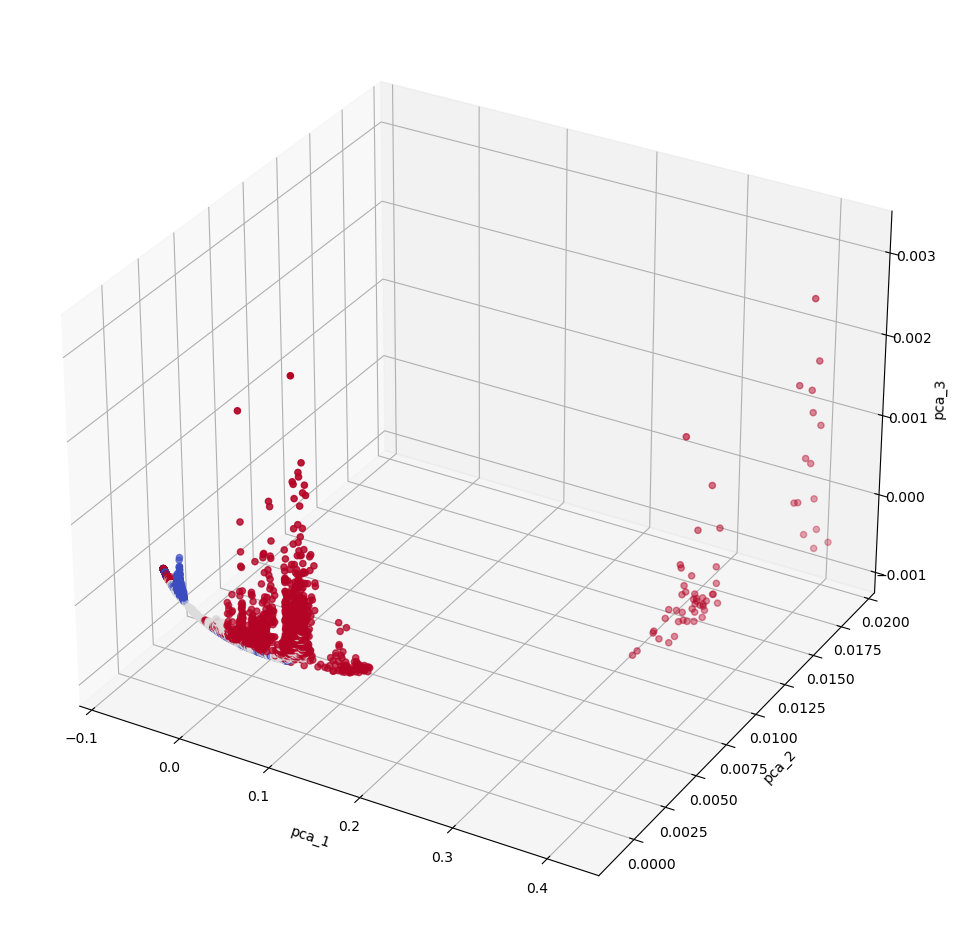

In [340]:
fig_reduced_data = plt.figure(figsize=(12,12))
ax = plt.subplot(1,1,1,projection='3d')
ax.scatter(x_pca_frame.pca_1,x_pca_frame.pca_2,x_pca_frame.pca_3, c=(y_values+100), cmap='coolwarm')
ax.set_xlabel('pca_1')
ax.set_ylabel('pca_2')
ax.set_zlabel('pca_3')

print(y_pred)
import collections
counter = collections.Counter(y_pred)
print(counter)

# TSNE

In [341]:
# 建立tsne轉換器
import seaborn as sns
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=4242, init='pca', perplexity=100, verbose=1,n_jobs=10) # 困惑度慎選
x_tsne = tsne.fit_transform(x_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 5472 samples in 0.009s...
[t-SNE] Computed neighbors for 5472 samples in 0.112s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5472
[t-SNE] Computed conditional probabilities for sample 2000 / 5472
[t-SNE] Computed conditional probabilities for sample 3000 / 5472
[t-SNE] Computed conditional probabilities for sample 4000 / 5472
[t-SNE] Computed conditional probabilities for sample 5000 / 5472
[t-SNE] Computed conditional probabilities for sample 5472 / 5472
[t-SNE] Mean sigma: 0.000254


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.350887
[t-SNE] KL divergence after 1000 iterations: 0.184667


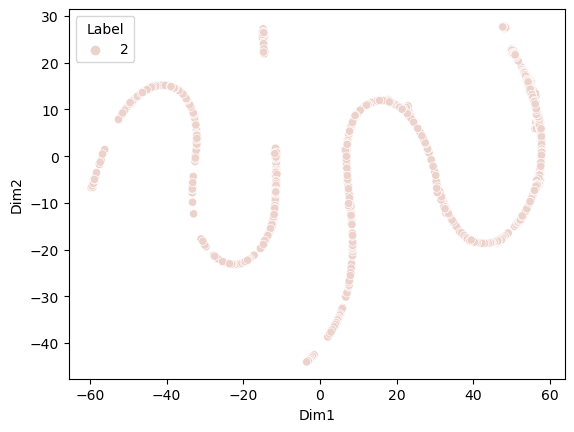

In [346]:
color=['r', 'g', 'b']
sns.color_palette("tab10")
step = (x_values.shape[0]) // category
for i in range(2,3):
    df_tsne = pd.DataFrame({
        "Dim1":x_tsne[step*i:step*(i+1),0],
        "Dim2":x_tsne[step*i:step*(i+1),1],
        "Label": y_values[step*i:step*(i+1)]
    })# 重建DataFrame
    ax = sns.scatterplot(x="Dim1", y="Dim2", hue="Label",
                      data=df_tsne, color=color[i])# 繪圖

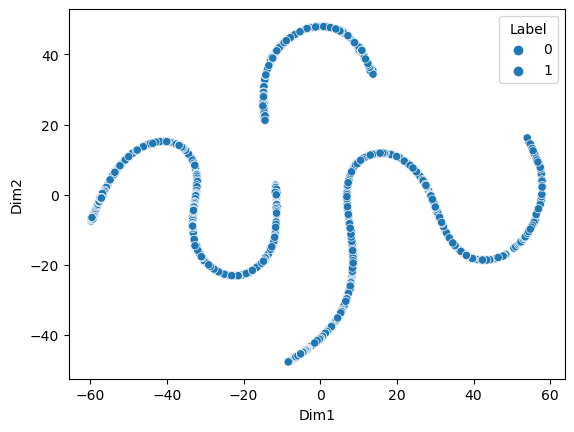

In [347]:
color=['r', 'g', 'b']
sns.color_palette("tab10")
step = (x_values.shape[0]) // category
for i in range(0,2):
    df_tsne = pd.DataFrame({
        "Dim1":x_tsne[step*i:step*(i+1),0],
        "Dim2":x_tsne[step*i:step*(i+1),1],
        "Label": y_values[step*i:step*(i+1)]
    })# 重建DataFrame
    ax = sns.scatterplot(x="Dim1", y="Dim2", hue="Label",
                      data=df_tsne, color=color[i])# 繪圖